In [1]:
import gensim
from sklearn.manifold import TSNE
from functional import seq
from gensim.models import Word2Vec, KeyedVectors
from typing import List,Dict,Tuple,Set
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
model = KeyedVectors.load_word2vec_format("~/tmp/nlp/word2vecpl/skip_gram_v100m8.w2v.txt", binary=False)

In [102]:
def most_similar(word:str,top:int=3):
    return model.most_similar(positive=[word],topn=top)

## 1. Using the downloaded model find the most similar word or expressions for the following expressions:
        sąd wysoki
        trybunał konstytucyjny
        kodeks cywilny
        kpk
        sąd rejonowy
        szkoda
        wypadek
        kolizja
        szkoda majątkowy
        nieszczęście
        rozwód


In [103]:
def present_lemmas_similar(lemmas:List[str], top:int=4) -> None:
    for lemma in lemmas:
        print(lemma)
        print(seq(most_similar(lemma,top=top)).map(lambda tup: str(tup)).reduce(lambda x,y : x+"\n" +y))
        print(" ")

In [104]:
#Cannot find this one, even with grep.
# print(most_similar("ne#Sąd_wysoki::noun")) 
# print(most_similar("sąd_wysoki::noun")) 

In [105]:
present_lemmas_similar(["ne#Trybunał_konstytucyjny::noun"])

ne#Trybunał_konstytucyjny::noun
('ne#Trybunału_Kostytucyjnego::noun', 0.8643284440040588)
('antykonstytucyjność::noun', 0.8617954254150391)
('ne#Senator_Gołąbek::noun', 0.8617493510246277)
('ne#K._Świrydowicz::noun', 0.8613615036010742)
 


In [106]:
kodeks= ["ne#kodeks_cywilny::noun","ne#Kodeks_cywilny::noun","ne#Kodeks_Cywilny::noun"]
present_lemmas_similar(kodeks)

ne#kodeks_cywilny::noun
('ne#ustawy_reformujące_administrację_publiczną::noun', 0.9462257027626038)
('ne#kodeks_postępowania_karnego::noun', 0.9376614093780518)
('ne#Prawo_o_publicznym_obrocie_papierami_wartościowymi_i_funduszach_powierniczych::noun', 0.937140703201294)
('ne#Prawo_ochrony_środowiska_oraz_niektórych_innych_ustaw::noun', 0.9331021904945374)
 
ne#Kodeks_cywilny::noun
('ne#Kodeks_postępowania_cywilnego::noun', 0.8673800230026245)
('ne#Kodeks_Cywilny::noun', 0.8606271147727966)
('ne#Kodeks_pracy::noun', 0.8436057567596436)
('ne#Kodeks_spółek_handlowych::noun', 0.8395817279815674)
 
ne#Kodeks_Cywilny::noun
('kodeks_cywilny::noun', 0.8858152627944946)
('ne#Kodeks_cywilny::noun', 0.8606271147727966)
('ne#Kodeksu_cywilnego::noun', 0.8430942296981812)
('ne#Kodeksie_Cywilnym::noun', 0.8161975741386414)
 


In [107]:
present_lemmas_similar(["ne#Kpk::noun","kpk::noun"],top=7)

ne#Kpk::noun
('ne#Kodeksu_postępowania_karnego::noun', 0.8927974104881287)
('ne#Kodeksie_postępowania_karnego::noun', 0.8502542972564697)
('ne#Kodeksu_postępowania_w_sprawach_o_wykroczenia::noun', 0.830034613609314)
('ne#Kodeksu_karnego_skarbowego::noun', 0.8285540342330933)
('ne#Kpa::noun', 0.828014612197876)
('intertemporalnego::adj', 0.8200398683547974)
('ne#Kodeksie_wykroczeń::noun', 0.8171638250350952)
 
kpk::noun
('ne#Kodeksu_postępowania_karnego::noun', 0.8661121129989624)
('kpk::adj', 0.8617310523986816)
('kpc::noun', 0.8536956310272217)
('kk::noun', 0.8311821818351746)
('ppsa::noun', 0.8293906450271606)
('ne#KPC::noun', 0.8081650733947754)
('ne#Kodeksu_postępowania_w_sprawach_o_wykroczenia::noun', 0.8027453422546387)
 


In [97]:
! cat ~/tmp/nlp/word2vecpl/skip_gram_v100m8.w2v.txt | awk '{print $1}' | grep -E "rejonow"

rejonowy::adj
rejonow::noun
nierejonowy::adj
rejonowyc::noun
ne#Sądu_rejonowego::noun
rejonoweg::adj
rejonowo::adv
rejonowo::adj
rejonow::adj
rejonowyc::adj
rejonoweg::noun
pozarejonowych::adj
miœdzyrejonowego::adj


In [108]:
present_lemmas_similar(["ne#Sądu_rejonowego::noun"])

ne#Sądu_rejonowego::noun
('ne#Elektronicznym_Postępowaniu_Upominawczym::noun', 0.8824101686477661)
('rejonoweg::adj', 0.8811922073364258)
('ne#NSA_Ośrodek_Zamiejscowy::noun', 0.878535807132721)
('ne#Sądu_Okręgowego_Warszawa-Praga::noun', 0.8777221441268921)
 


In [11]:
present_lemmas_similar([
    "szkoda::noun",
    "kolizja::noun",
    "szkoda_majątkowa::noun",
    "nieszczęście::noun",
    "rozwód::noun"
],top=10)

szkoda::noun
('wyrządzić::verb', 0.7564010620117188)
('Krzywda::noun', 0.7515829205513)
('strata::noun', 0.7275083661079407)
('nieszczęście::noun', 0.7267874479293823)
('obawiać_się::verb', 0.7152366638183594)
('pożytek::noun', 0.7028508186340332)
('żałować::verb', 0.7016452550888062)
('korzyść::noun', 0.6929349303245544)
('skutek::noun', 0.6910550594329834)
('przypuszczać::verb', 0.6901097297668457)
 
kolizja::noun
('kolizja_drogowa::noun', 0.8072466850280762)
('kolizj::noun', 0.7978355288505554)
('wypadek_drogowy::noun', 0.7862640619277954)
('zderzenie::noun', 0.7812461256980896)
('zderzenie_czołowe::noun', 0.7508682608604431)
('kraksa::noun', 0.7374911308288574)
('stłuczka::noun', 0.7361663579940796)
('drogowyc::noun', 0.7356817126274109)
('zdarzać::noun', 0.7281510829925537)
('awaria::noun', 0.7276296615600586)
 
szkoda_majątkowa::noun
('wyrządzić::noun', 0.8379963636398315)
('damnum::noun', 0.7640699148178101)
('wyrządzo::noun', 0.7530648708343506)
('delikt::noun', 0.7494425773620

2\. Find the result of the following equations (5 top results):
* sąd wysoki - kpc + konstytucja
* pasażer - mężczyzna + kobieta
* samochód - droga + rzeka


In [110]:
def vec(word:str):
    return model.get_vector(word)

def noun_vec(noun:str):
    return model.get_vector(noun+ "::noun")

def most_similar_by_vec(vector:np.ndarray,top:int=3):
    return model.similar_by_vector(vector,top)

#a)
* sąd wysoki - kpc + konstytucja
> Cannot find sąd wysoki,trying `sąd kościelny - kościół + konstytucja`

In [114]:
most_similar_by_vec(noun_vec("sąd_kościelny")-noun_vec("kościół") + noun_vec("konstytucja"),top=6)

[('ustawa_zasadnicza::noun', 0.7653346657752991),
 ('konstytucja::noun', 0.754104495048523),
 ('konstytucyjny::adj', 0.7414056062698364),
 ('ne#Trybunał_Konstytucyjny::noun', 0.7001773118972778),
 ('ne#Trybunał::noun', 0.6997947692871094),
 ('umowa_międzynarodowa::noun', 0.6960768699645996)]

In [118]:
most_similar_by_vec(noun_vec("pasażer")-noun_vec("mężczyzna") + noun_vec("kobieta"),top=10)

[('pasażer::noun', 0.9536111950874329),
 ('podróżny::noun', 0.8415741324424744),
 ('współpasażer::noun', 0.7920055389404297),
 ('podróżujący::noun', 0.7550978660583496),
 ('kierowca::noun', 0.7446857690811157),
 ('bagażowy::noun', 0.7316379547119141),
 ('turysta::noun', 0.7310489416122437),
 ('podróżny::adj', 0.7293795347213745),
 ('stewardesa::noun', 0.725443959236145),
 ('pasażerski::adj', 0.7142226696014404)]

In [14]:
most_similar_by_vec(noun_vec("samochód")-noun_vec("droga") + noun_vec("rzeka"),top=6)

[('motorówka::noun', 0.7439929842948914),
 ('jezioro::noun', 0.7345261573791504),
 ('Łódź::noun', 0.7254728078842163),
 ('rzeka::noun', 0.7248798608779907),
 ('ne#Helensburgha::noun', 0.7246426343917847),
 ('ne#East_River::noun', 0.7199319005012512)]

## 3\. Using the t-SNE algorithm comput the projection of the random 1000 words with the following words highlighted (assuming they are available):
* szkoda
* strata
* uszczerbek
* szkoda majątkowy
* uszczerbek na zdrowie
* krzywda
* niesprawiedliwość
* nieszczęście

In [3]:
! cat ~/tmp/nlp/word2vecpl/skip_gram_v100m8.w2v.txt | awk '{print $1}' | grep -E "^szkoda:|^szkodzić:"

szkoda::noun
szkoda::verb
szkodzić::verb
szkodzić::noun
szkoda::adv


In [17]:
szkoda_lemmas = [
    "szkoda::noun",
    "szkoda::verb",
    "szkodzić::verb",
    "szkodzić::noun"
]

In [18]:
! cat ~/tmp/nlp/word2vecpl/skip_gram_v100m8.w2v.txt | awk '{print $1}' | grep -E "^(u|s)tra(cić|ta):"

stracić::verb
strata::noun
utrata::noun
utracić::verb
stracić::noun
utracić::noun


In [19]:
strata_lemmas = [
    "stracić::verb",
    "strata::noun",
    "utrata::noun",
    "utracić::verb",
    "stracić::noun",
    "utracić::noun"
]

In [20]:
! cat ~/tmp/nlp/word2vecpl/skip_gram_v100m8.w2v.txt | awk '{print $1}' | grep -E "usczerb"

In [21]:
uszczerbek_lemmas = []

In [22]:
szkoda_maj_lemmas = ["szkoda_majątkowa::noun"]

In [23]:
uszczerberk_na_zdrowie_lemmas = []

In [24]:
! ! cat ~/tmp/nlp/word2vecpl/skip_gram_v100m8.w2v.txt | awk '{print $1}' | grep -E "^(u|s)?krzywd"

skrzywdzić::verb
krzywdzić::verb
krzywdzący::adj
skrzywdzony::adj
krzywdzić::noun
krzywde::noun
krzywdziciel::noun
skrzywdzić::noun
ukrzywdzić::verb
skrzywdzic::noun
krzywdzace::noun
krzywdząco::adv
krzywdzic::noun
krzywdować::verb
skrzywdzil::noun
krzywde::xxx
ukrzywdzony::adj
krzywdza::noun
krzywdze::verb
skrzywdzic::xxx
krzywde::adj
krzywde::qub
skrzywdzil::verb
krzywdzaca::noun
krzywdz::noun
krzywdzik::noun
skrzywdze::verb
krzywdzacy::adj
skrzywdzila::noun
skrzywdzic::verb
ukrzywdzić::noun
krzywdza::verb
krzywdzil::noun
krzywde::verb
krzywdzacy::noun
krzywdzic::verb
krzywdzicielka::noun
skrzywdzilem::noun
krzywdzac::noun
krzywdze::noun
skrzywdzic::adj
krzywdzacych::adj
krzywdz::verb
krzywdzšce::noun
krzywdzacego::adj
skrzywdzil::adj
krzywdš::noun
krzywdza::adj
skrzywdz::verb
skrzywdzil::xxx
skrzywdza::noun
skrzywdzeń::noun
krzywdzš::noun
skrzywdzilam::noun
krzywdzic::xxx
skrzywdza::verb
ukrzywdzać::verb
krzywdä::noun
skrzywdziles::noun
krzywdzac::verb
krzywdzacej::adj
skrzywdzilam

In [25]:
krzywda_lemmas = [
    "skrzywdzić::verb",
    "krzywdzić::verb",
    "krzywdzący::adj",
    "skrzywdzony::adj",
    "krzywdzić::noun",
    "krzywde::noun",
    "krzywdziciel::noun",
    "skrzywdzić::noun",
    "ukrzywdzić::verb",
    "skrzywdzic::noun",
    "krzywdzace::noun",
    "krzywdząco::adv",
    "krzywdzic::noun",
    "krzywdować::verb",
    "skrzywdzil::noun",
    "krzywde::xxx",
    "ukrzywdzony::adj",
    "krzywdza::noun",
    "krzywdze::verb",
    "skrzywdzic::xxx",
    "krzywde::adj",
    "krzywde::qub",
    "skrzywdzil::verb",
    "krzywdzaca::noun",
    "krzywdz::noun",
    "krzywdzik::noun",
    "skrzywdze::verb",
    "krzywdzacy::adj",
    "skrzywdzila::noun",
    "skrzywdzic::verb",
    "ukrzywdzić::noun",
    "krzywdza::verb",
    "krzywdzil::noun",
    "krzywde::verb",
    "krzywdzacy::noun",
    "krzywdzic::verb",
    "krzywdzicielka::noun",
    "skrzywdzilem::noun",
    "krzywdzac::noun",
    "krzywdze::noun",
    "skrzywdzic::adj",
    "krzywdzacych::adj",
    "krzywdz::verb",
    "krzywdzšce::noun",
    "krzywdzacego::adj",
    "skrzywdzil::adj",
    "krzywdš::noun",
    "krzywdza::adj",
    "skrzywdz::verb",
    "skrzywdzil::xxx",
    "skrzywdza::noun",
    "skrzywdzeń::noun",
    "krzywdzš::noun",
    "skrzywdzilam::noun",
    "krzywdzic::xxx",
    "skrzywdza::verb",
    "ukrzywdzać::verb",
    "krzywdä::noun",
    "skrzywdziles::noun",
    "krzywdzac::verb",
    "krzywdzacej::adj",
    "skrzywdzilam::verb",
    "krzywde::prep"
]

In [26]:
! cat ~/tmp/nlp/word2vecpl/skip_gram_v100m8.w2v.txt | awk '{print $1}' | grep -E "^niesprawiedliw"

niesprawiedliwy::adj
niesprawiedliwość::noun
niesprawiedliwie::adv
niesprawiedliwosc::noun
niesprawiedliwosci::noun
niesprawiedliwoscia::noun
niesprawiedliwośc::noun
niesprawiedliwo::noun
niesprawiedliw::noun
niesprawiedliwości::noun
niesprawiedliwoć::noun
niesprawiedliwoci::noun
niesprawiedliwosc::adj
niesprawiedliwoĺci::noun
niesprawiedliwoś::noun
niesprawiedliwosc::adv


In [27]:
niesprawiedliwosc_lemmas = [
    "niesprawiedliwy::adj",
    "niesprawiedliwość::noun",
    "niesprawiedliwie::adv",
    "niesprawiedliwosc::noun",
    "niesprawiedliwosci::noun",
    "niesprawiedliwoscia::noun",
    "niesprawiedliwośc::noun",
    "niesprawiedliwo::noun",
    "niesprawiedliw::noun",
    "niesprawiedliwości::noun",
    "niesprawiedliwoć::noun",
    "niesprawiedliwoci::noun",
    "niesprawiedliwosc::adj",
    "niesprawiedliwoĺci::noun",
    "niesprawiedliwoś::noun",
    "niesprawiedliwosc::adv"
]

In [28]:
! cat ~/tmp/nlp/word2vecpl/skip_gram_v100m8.w2v.txt | awk '{print $1}' | grep -E "^nieszczęś"

nieszczęście::noun
nieszczęśliwy::adj
nieszczęśnik::noun
nieszczęśliwie::adv
nieszczęśliwiec::noun
nieszczęśnica::noun
nieszczęśliwość::noun
nieszczęś::noun
nieszczęści::noun
nieszczęśli::noun
nieszczęśnie::adv
nieszczęśc::noun
nieszczęśliwemi::noun
nieszczęścia::noun
nieszczęśliw::noun
nieszczęśliwéj::noun
nieszczęśćie::noun
nieszczęśliwem::adj
nieszczęśniczki::noun
nieszczęściem::noun
nieszczęśliwéj::adj
nieszczęśliwem::noun
nieszczęśny::adj
nieszczęście::adv
nieszczęśliwa::noun


In [29]:
nieszczescie_lemmas = [
    "nieszczęście::noun",
    "nieszczęśliwy::adj",
    "nieszczęśnik::noun",
    "nieszczęśliwie::adv",
    "nieszczęśliwiec::noun",
    "nieszczęśnica::noun",
    "nieszczęśliwość::noun",
    "nieszczęś::noun",
    "nieszczęści::noun",
    "nieszczęśli::noun",
    "nieszczęśnie::adv",
    "nieszczęśc::noun",
    "nieszczęśliwemi::noun",
    "nieszczęścia::noun",
    "nieszczęśliw::noun",
    "nieszczęśliwéj::noun",
    "nieszczęśćie::noun",
    "nieszczęśliwem::adj",
    "nieszczęśniczki::noun",
    "nieszczęściem::noun",
    "nieszczęśliwéj::adj",
    "nieszczęśliwem::noun",
    "nieszczęśny::adj",
    "nieszczęście::adv",
    "nieszczęśliwa::noun"
]

In [77]:
highlighted = seq([
    szkoda_lemmas,
    strata_lemmas,
    uszczerbek_lemmas,
    szkoda_maj_lemmas,
    uszczerberk_na_zdrowie_lemmas,
    krzywda_lemmas,
    niesprawiedliwosc_lemmas,
    nieszczescie_lemmas
]).flat_map(lambda a:a).to_set()
list(highlighted)[:10]

['skrzywdze::verb',
 'krzywdzik::noun',
 'krzywdzic::xxx',
 'ukrzywdzać::verb',
 'skrzywdzil::xxx',
 'skrzywdziles::noun',
 'nieszczęśliwéj::noun',
 'nieszczęśnica::noun',
 'szkodzić::noun',
 'nieszczęśli::noun']

In [35]:
word_count = len(model.vocab.keys())
word_count

2502337

In [52]:
indices = np.array(random.sample(range(0, word_count),1000))
indices.shape

(1000,)

In [53]:
keys = np.array(list(model.vocab.keys()))
keys.shape

(2502337,)

In [54]:
chosen_keys = keys.take(indices)
chosen_keys.shape

(1000,)

In [55]:
chosen_vecs = model.vectors.take(indices,axis=0)
chosen_vecs.shape

(1000, 100)

> Added highlighted words manualy, because there is low probability of choosing them randomly

In [86]:
hl_mask = np.in1d(keys,list(highlighted)) 
hl_mask.shape

(2502337,)

In [87]:
hl_keys = keys[hl_mask]
hl_vecs= model.vectors[hl_mask]

In [88]:
hl_vecs.shape

(115, 100)

In [89]:
all_vecs = np.vstack((chosen_vecs,hl_vecs))
all_vecs.shape

(1115, 100)

In [90]:
all_2d = TSNE().fit_transform(all_vecs)
all_2d.shape

(1115, 2)

In [91]:
chosen_2d = all_2d[:1000]
chosen_2d.shape

(1000, 2)

In [92]:
hl_2d = all_2d[1000:]
hl_2d.shape

(115, 2)

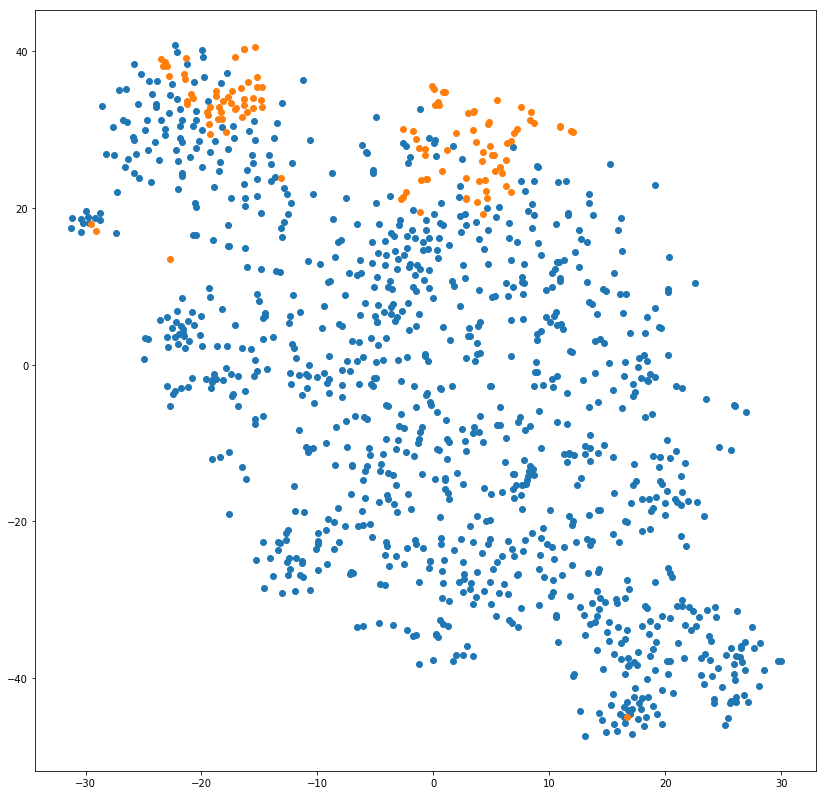

In [94]:
def plot_2d(random:np.ndarray,highlighted:np.ndarray) -> None:
    # todo - split vecs where labels are and where labels are not, 
    x, y = random[:,0], random[:,1]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(14,14)
    ax.scatter(x, y,)
    
    hl_x, hl_y = highlighted[:,0], highlighted[:,1]
    ax.scatter(hl_x,hl_y)
    
    plt.show()

plot_2d(chosen_2d,hl_2d)